# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [4]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
# Load dataset
df = pd.read_csv(r"C:\Users\user\Downloads\train_house.csv")  # Gunakan raw string (r"") untuk menghindari error

# Menampilkan informasi dataset
df.info()

# Menampilkan beberapa baris pertama
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Drop variabel NaN
# Menghapus kolom dengan banyak NaN (lebih dari 50% data hilang)
df_cleaned = df.dropna(axis=1, thresh=0.5 * len(df))

# Menghapus baris dengan NaN pada dataset yang tersisa
df_cleaned = df_cleaned.dropna()

# Menampilkan jumlah baris dan kolom setelah pembersihan
df_cleaned.shape

(583, 76)

In [12]:
# Memisahkan kolom numerik dan kategorikal
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f"Jumlah kolom numerik: {len(numerical_cols)}")
print(f"Jumlah kolom kategorikal: {len(categorical_cols)}")

Jumlah kolom numerik: 38
Jumlah kolom kategorikal: 38


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

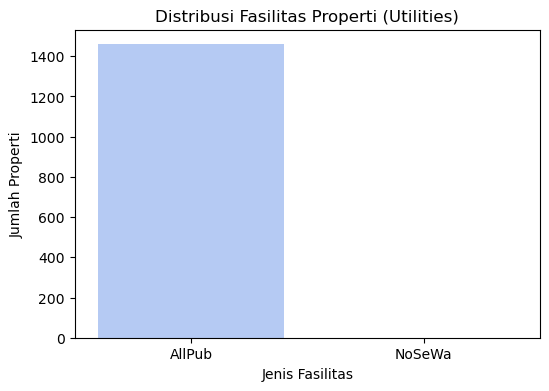

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_cleaned, 
    x="Utilities", 
    hue="Utilities", 
    palette="coolwarm", 
    legend=False  
)
plt.title("Distribusi Fasilitas Properti (Utilities)")
plt.xlabel("Jenis Fasilitas")
plt.ylabel("Jumlah Properti")
plt.show()


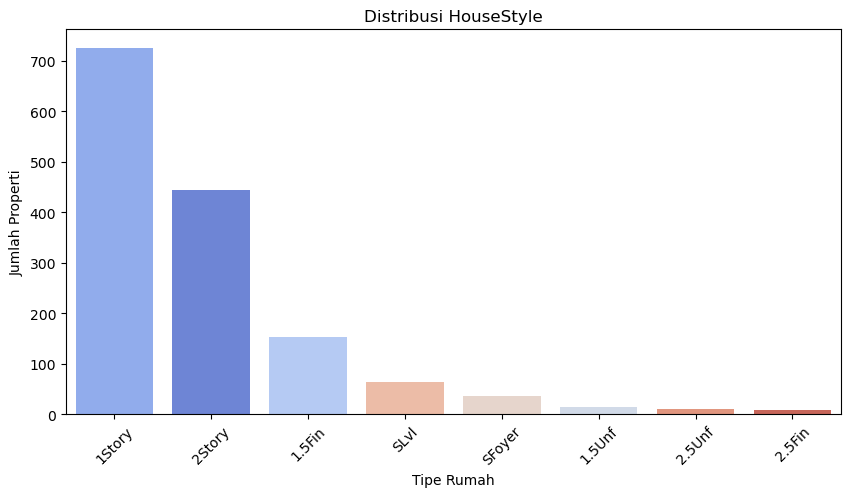

In [49]:
#HouseStyle
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_cleaned, 
    x="HouseStyle", 
    hue="HouseStyle",  
    palette="coolwarm", 
    order=df_cleaned["HouseStyle"].value_counts().index,
    legend=False  
)
plt.xticks(rotation=45)
plt.title("Distribusi HouseStyle")
plt.xlabel("Tipe Rumah")
plt.ylabel("Jumlah Properti")
plt.show()


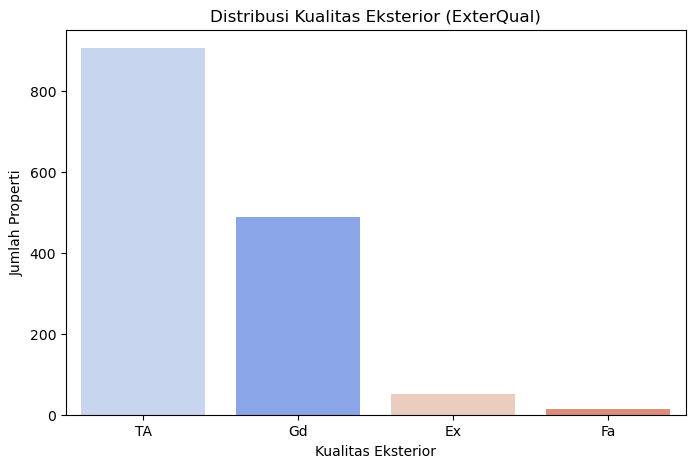

In [50]:
#ExterQual


plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_cleaned, 
    x="ExterQual", 
    hue="ExterQual",  
    palette="coolwarm", 
    order=df_cleaned["ExterQual"].value_counts().index,
    legend=False  
)
plt.title("Distribusi Kualitas Eksterior (ExterQual)")
plt.xlabel("Kualitas Eksterior")
plt.ylabel("Jumlah Properti")
plt.show()



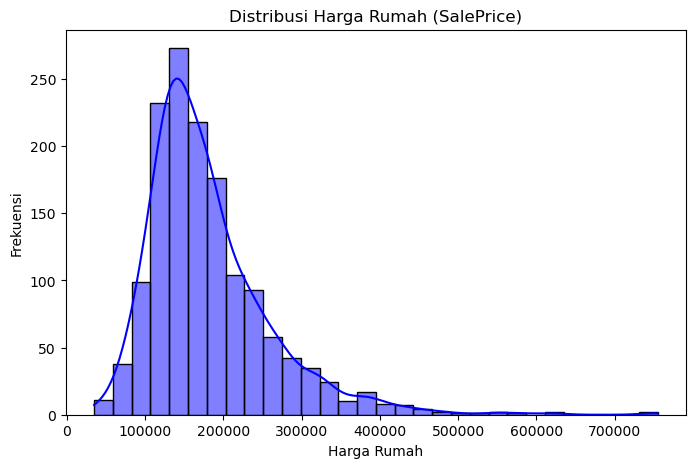

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["SalePrice"], bins=30, kde=True, color="blue")
plt.title("Distribusi Harga Rumah (SalePrice)")
plt.xlabel("Harga Rumah")
plt.ylabel("Frekuensi")
plt.show()


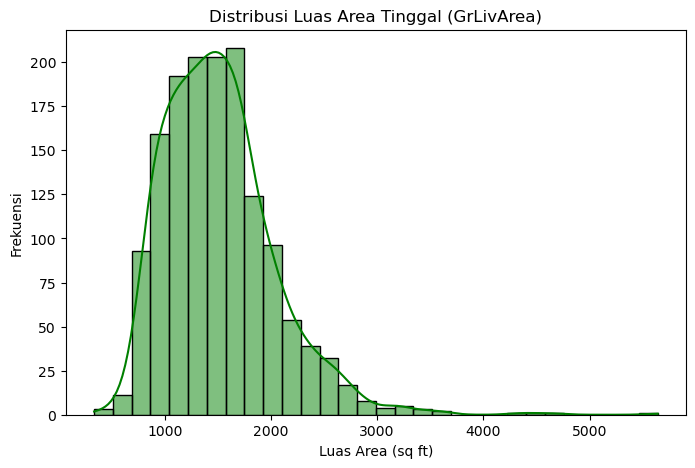

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["GrLivArea"], bins=30, kde=True, color="green")
plt.title("Distribusi Luas Area Tinggal (GrLivArea)")
plt.xlabel("Luas Area (sq ft)")
plt.ylabel("Frekuensi")
plt.show()


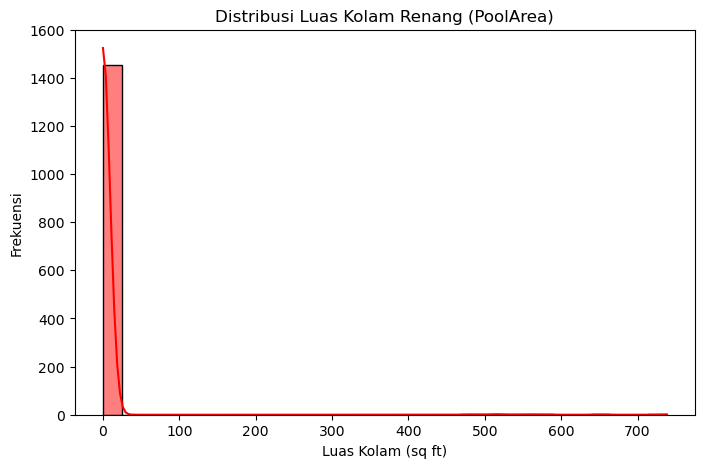

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["PoolArea"], bins=30, kde=True, color="red")
plt.title("Distribusi Luas Kolam Renang (PoolArea)")
plt.xlabel("Luas Kolam (sq ft)")
plt.ylabel("Frekuensi")
plt.show()


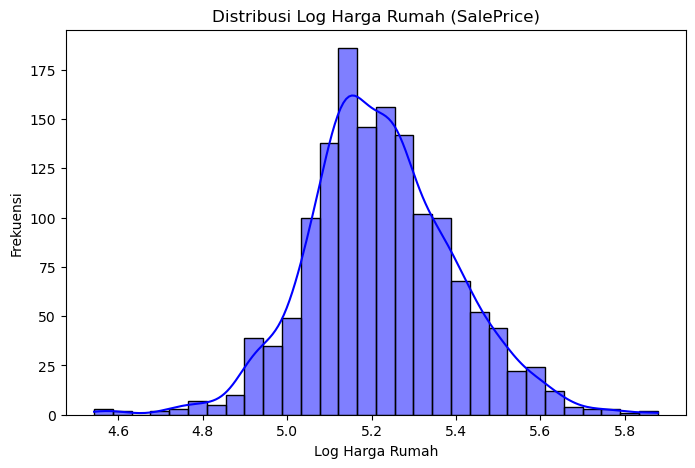

In [55]:
#Pemrosesan Data (Transformasi Log-10)

df_cleaned["SalePrice_log"] = np.log10(df_cleaned["SalePrice"])
df_cleaned["GrLivArea_log"] = np.log10(df_cleaned["GrLivArea"])
df_cleaned["PoolArea_log"] = np.log10(df_cleaned["PoolArea"] + 1)  # Menghindari log(0)

# Visualisasi setelah transformasi
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["SalePrice_log"], bins=30, kde=True, color="blue")
plt.title("Distribusi Log Harga Rumah (SalePrice)")
plt.xlabel("Log Harga Rumah")
plt.ylabel("Frekuensi")
plt.show()


## Variabel Kategorikal

In [ ]:
#Analisis Transformasi Log
#SalePrice dan GrLivArea setelah transformasi lebih mendekati distribusi normal, 
# yang lebih baik untuk model machine learning.
#PoolArea tetap banyak nilai nol, tapi dengan transformasi, skala data menjadi lebih mudah dianalisis.


### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

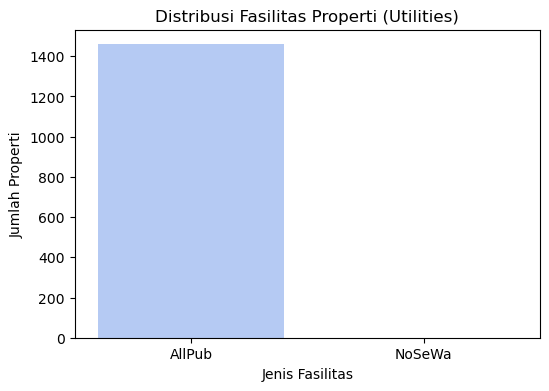

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_cleaned, 
    x="Utilities", 
    hue="Utilities",  # Tambahkan hue agar palette tetap bekerja
    palette="coolwarm", 
    legend=False  # Hilangkan legend agar lebih rapi
)
plt.title("Distribusi Fasilitas Properti (Utilities)")
plt.xlabel("Jenis Fasilitas")
plt.ylabel("Jumlah Properti")
plt.show()


### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

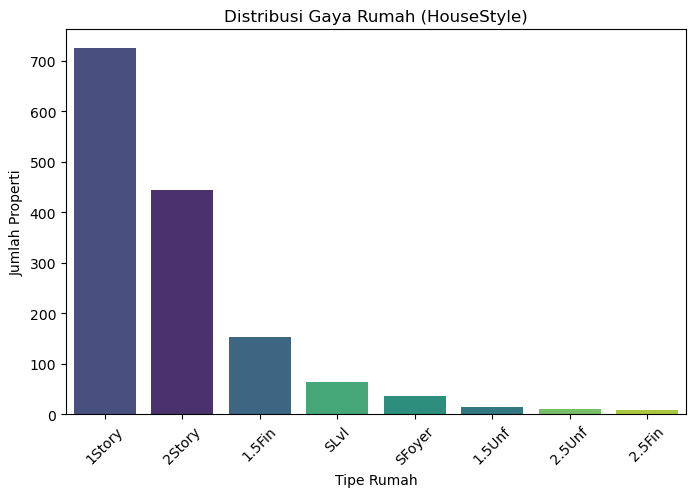

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_cleaned, 
    x="HouseStyle", 
    hue="HouseStyle",  
    palette="viridis", 
    order=df_cleaned["HouseStyle"].value_counts().index,
    legend=False  
)
plt.title("Distribusi Gaya Rumah (HouseStyle)")
plt.xlabel("Tipe Rumah")
plt.ylabel("Jumlah Properti")
plt.xticks(rotation=45)
plt.show()


### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

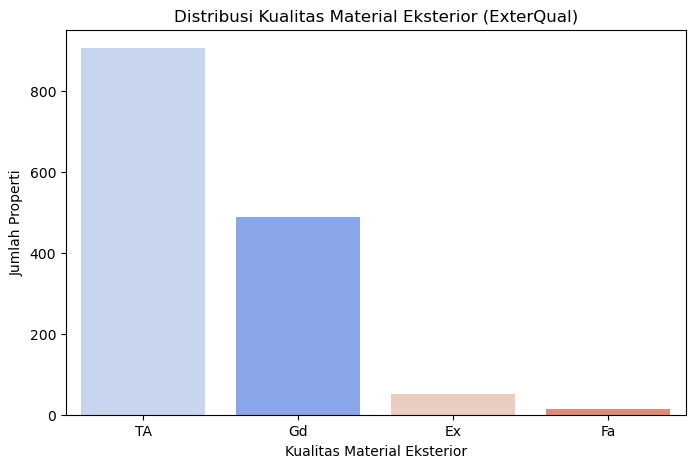

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_cleaned, 
    x="ExterQual", 
    hue="ExterQual",  # ✅ Tambahkan hue agar palette tetap berfungsi
    order=df_cleaned["ExterQual"].value_counts().index, 
    palette="coolwarm",
    legend=False  # ✅ Hilangkan legend agar tampilan lebih rapi
)
plt.title("Distribusi Kualitas Material Eksterior (ExterQual)")
plt.xlabel("Kualitas Material Eksterior")
plt.ylabel("Jumlah Properti")
plt.show()


#### **Analisis tentang variabel kategorikal**

#Analisis tentang Variabel Kategorikal
Distribusi Variabel Kategorikal

Dari visualisasi countplot, kita dapat melihat distribusi kategori untuk masing-masing variabel (Utilities, HouseStyle, dan ExterQual).
Jika ada kategori yang sangat jarang muncul, mungkin lebih baik untuk menggabungkannya dengan kategori lain atau menghapusnya tergantung pada tujuan analisis.
Ketimpangan dalam Kategori (Imbalanced Data)

Jika ada kategori yang mendominasi terlalu banyak, ini bisa menyebabkan model prediktif bias terhadap kategori tersebut.
Misalnya, jika hampir semua rumah memiliki ExterQual = TA, maka fitur ini mungkin kurang informatif untuk prediksi harga rumah.
Kaitan dengan Variabel Target

Apakah ada hubungan antara HouseStyle dan harga rumah (SalePrice)?
Apakah ExterQual yang lebih tinggi selalu berarti harga rumah lebih mahal?
Apakah Utilities memiliki dampak signifikan terhadap harga rumah, atau sebagian besar rumah memiliki nilai yang sama?
❓ Pertanyaan untuk Analisis Lanjutan
Bagaimana hubungan antara variabel kategorikal dan harga rumah (SalePrice)?

Bisa menggunakan boxplot (sns.boxplot()) untuk melihat distribusi harga berdasarkan kategori.
Apakah ada korelasi antara HouseStyle dan ukuran rumah (GrLivArea)?

Rumah dengan HouseStyle tertentu cenderung memiliki luas bangunan lebih besar/kecil?
Bagaimana pola distribusi ExterQual?

Apakah sebagian besar rumah memiliki kualitas eksterior yang tinggi, atau ada variasi yang signifikan?
Bagaimana variabel kategorikal ini mempengaruhi harga rumah jika dibandingkan dengan fitur numerik?

Bisa menggunakan analisis regresi atau visualisasi tambahan.


## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [68]:
# Statistik deskriptif SalePrice
median_saleprice = df_cleaned["SalePrice"].median()
mean_saleprice = df_cleaned["SalePrice"].mean()
std_saleprice = df_cleaned["SalePrice"].std()

print(f"Median SalePrice: {median_saleprice}")
print(f"Mean SalePrice: {mean_saleprice}")
print(f"Standard Deviation SalePrice: {std_saleprice}")


Median SalePrice: 163000.0
Mean SalePrice: 180921.19589041095
Standard Deviation SalePrice: 79442.50288288663


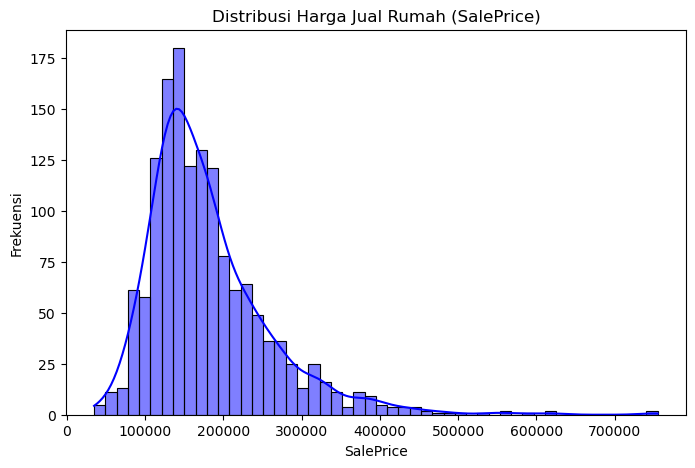

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["SalePrice"], bins=50, kde=True, color="blue")
plt.title("Distribusi Harga Jual Rumah (SalePrice)")
plt.xlabel("SalePrice")
plt.ylabel("Frekuensi")
plt.show()


#### **Analisis tentang variabel `SalePrice`**

* Analisis SalePrice
Rata-rata harga rumah lebih tinggi dari median, menunjukkan adanya beberapa rumah yang sangat mahal (outlier).
Distribusi harga rumah miring ke kanan (skewed right), menunjukkan bahwa sebagian besar rumah dijual dengan harga lebih rendah daripada beberapa properti yang sangat mahal.
Standar deviasi cukup besar, menandakan variasi harga yang tinggi dalam dataset ini.


### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [70]:
# Statistik deskriptif GrLivArea
median_grlivarea = df_cleaned["GrLivArea"].median()
mean_grlivarea = df_cleaned["GrLivArea"].mean()
std_grlivarea = df_cleaned["GrLivArea"].std()

print(f"Median GrLivArea: {median_grlivarea}")
print(f"Mean GrLivArea: {mean_grlivarea}")
print(f"Standard Deviation GrLivArea: {std_grlivarea}")


Median GrLivArea: 1464.0
Mean GrLivArea: 1515.463698630137
Standard Deviation GrLivArea: 525.4803834232027


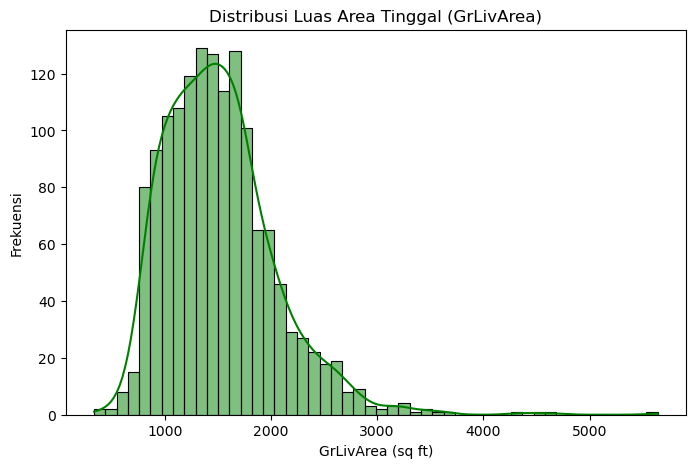

In [71]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["GrLivArea"], bins=50, kde=True, color="green")
plt.title("Distribusi Luas Area Tinggal (GrLivArea)")
plt.xlabel("GrLivArea (sq ft)")
plt.ylabel("Frekuensi")
plt.show()


#### **Analisis tentang variabel `GrlivArea`**

Analisis GrLivArea
Distribusi miring ke kanan, menunjukkan adanya beberapa rumah dengan luas yang sangat besar sebagai outlier.
Mean lebih tinggi dari median, mengonfirmasi bahwa sebagian besar rumah memiliki luas lebih kecil dibandingkan beberapa rumah dengan ukuran besar.
Bisa dilakukan transformasi log-10 untuk mengurangi skewness pada distribusi.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [72]:
# Statistik deskriptif GarageArea
median_garagearea = df_cleaned["GarageArea"].median()
mean_garagearea = df_cleaned["GarageArea"].mean()
std_garagearea = df_cleaned["GarageArea"].std()

print(f"Median GarageArea: {median_garagearea}")
print(f"Mean GarageArea: {mean_garagearea}")
print(f"Standard Deviation GarageArea: {std_garagearea}")


Median GarageArea: 480.0
Mean GarageArea: 472.9801369863014
Standard Deviation GarageArea: 213.80484145338076


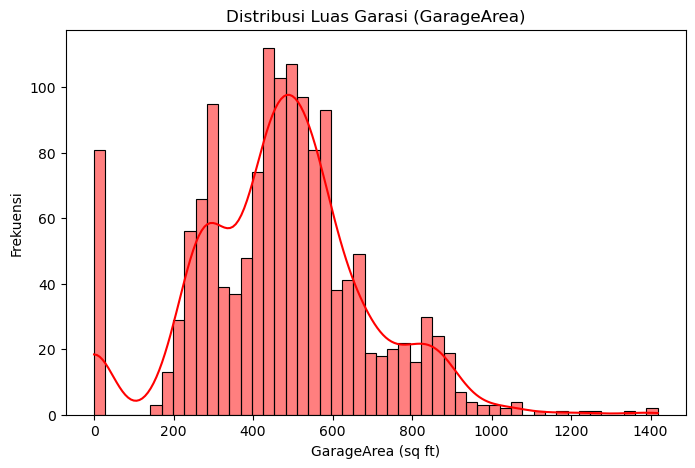

In [73]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["GarageArea"], bins=50, kde=True, color="red")
plt.title("Distribusi Luas Garasi (GarageArea)")
plt.xlabel("GarageArea (sq ft)")
plt.ylabel("Frekuensi")
plt.show()


#### **Analisis tentang variabel `GarageArea`**

* Analisis GarageArea
Sebagian besar rumah memiliki luas garasi antara 200-600 square feet, dengan beberapa outlier yang memiliki garasi sangat besar.
Distribusi juga miring ke kanan, menunjukkan bahwa beberapa rumah memiliki garasi yang jauh lebih besar dibandingkan mayoritas rumah lainnya.
Perlu ditangani nilai nol sebelum melakukan analisis lebih lanjut.

## Pemrosesan Data Variabel Numerikal

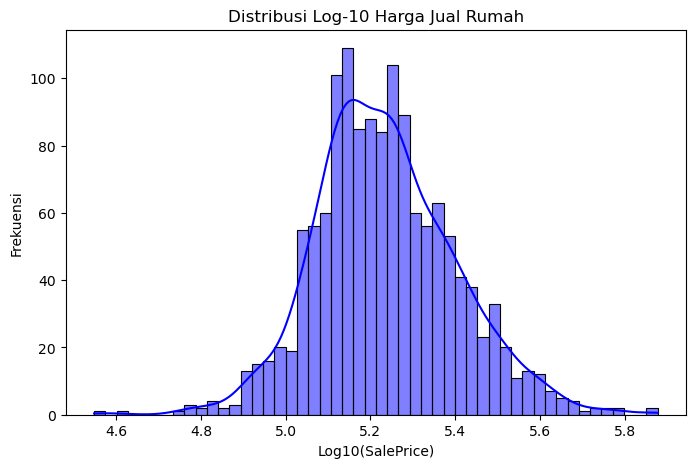

In [81]:
df_cleaned["Log_SalePrice"] = np.log10(df_cleaned["SalePrice"])

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Log_SalePrice"], bins=50, kde=True, color="blue")
plt.title("Distribusi Log-10 Harga Jual Rumah")
plt.xlabel("Log10(SalePrice)")
plt.ylabel("Frekuensi")
plt.show()

#Analisis:
#Transformasi log-10 berhasil membuat distribusi lebih mendekati normal.


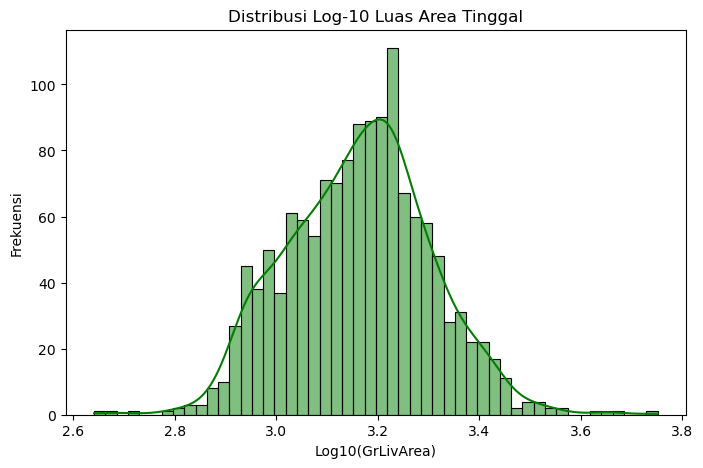

In [ ]:
df_cleaned["Log_GrLivArea"] = np.log10(df_cleaned["GrLivArea"])

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Log_GrLivArea"], bins=50, kde=True, color="green")
plt.title("Distribusi Log-10 Luas Area Tinggal")
plt.xlabel("Log10(GrLivArea)")
plt.ylabel("Frekuensi")
plt.show()

#Analisis:
# Transformasi log-10 membantu mengurangi skewness dan membuat distribusi lebih simetris.


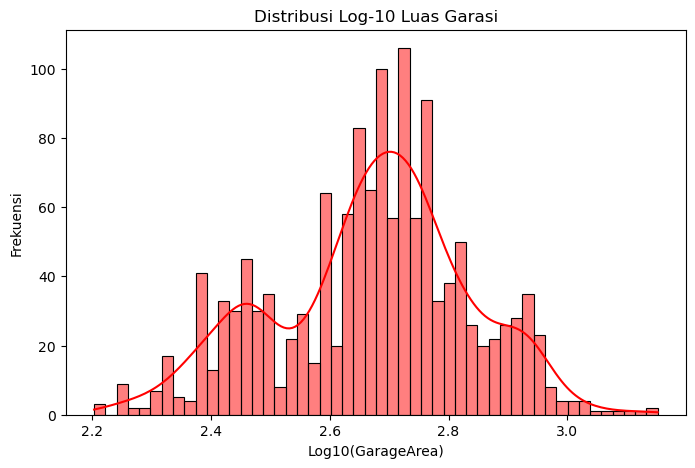

In [82]:
df_cleaned = df_cleaned[df_cleaned["GarageArea"] > 0]
df_cleaned["Log_GarageArea"] = np.log10(df_cleaned["GarageArea"])

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Log_GarageArea"], bins=50, kde=True, color="red")
plt.title("Distribusi Log-10 Luas Garasi")
plt.xlabel("Log10(GarageArea)")
plt.ylabel("Frekuensi")
plt.show()

#Analisis:
#Menghapus nilai nol membantu menghindari kesalahan dalam transformasi log.
#Distribusi menjadi lebih normal dibandingkan sebelum transformasi.


#### **Penjelasan dan analisis tentang pemrosesan data**

Transformasi Log-10

Transformasi log-10 digunakan untuk mengatasi distribusi yang skewed (condong) pada variabel numerikal seperti SalePrice dan GrLivArea.
Banyak data real estate memiliki skewness positif, yang berarti lebih banyak rumah dengan harga rendah dibandingkan yang mahal.
Dengan transformasi log-10, data menjadi lebih mendekati distribusi normal, sehingga lebih mudah dianalisis dan lebih cocok untuk model prediksi.
Menghilangkan Nilai Nol pada GarageArea

Ada properti yang tidak memiliki garasi, sehingga nilai GarageArea bisa bernilai nol (0).
Nilai nol dapat menyebabkan masalah saat melakukan transformasi log (karena log(0) tidak terdefinisi).
Solusi: Menghapus atau mengganti nilai nol dengan nilai minimum non-nol yang masuk akal.
Analisis
Apakah transformasi log-10 membantu dalam membuat distribusi data lebih normal?
Apakah nilai nol pada GarageArea sebaiknya dihapus atau diganti dengan nilai lain?
Bagaimana dampak transformasi log terhadap interpretasi harga rumah dan luas area?

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

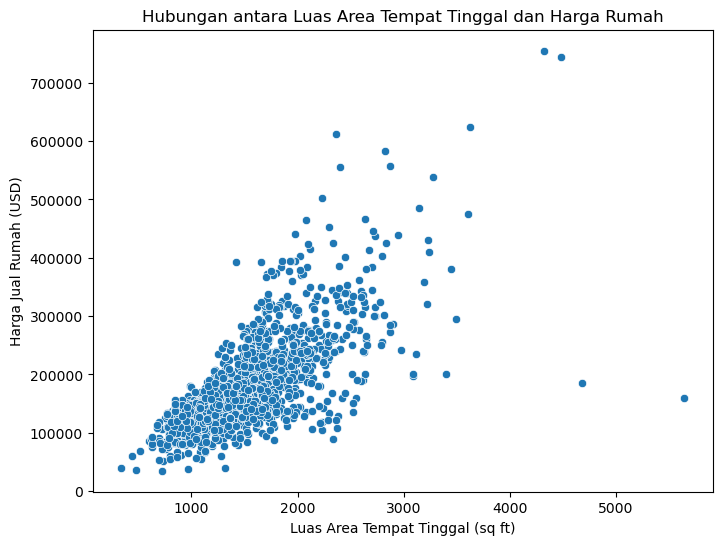

In [83]:
# Scatterplot: GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('Luas Area Tempat Tinggal (sq ft)')
plt.ylabel('Harga Jual Rumah (USD)')
plt.title('Hubungan antara Luas Area Tempat Tinggal dan Harga Rumah')
plt.show()


# `GarageArea` dengan `SalePrice`

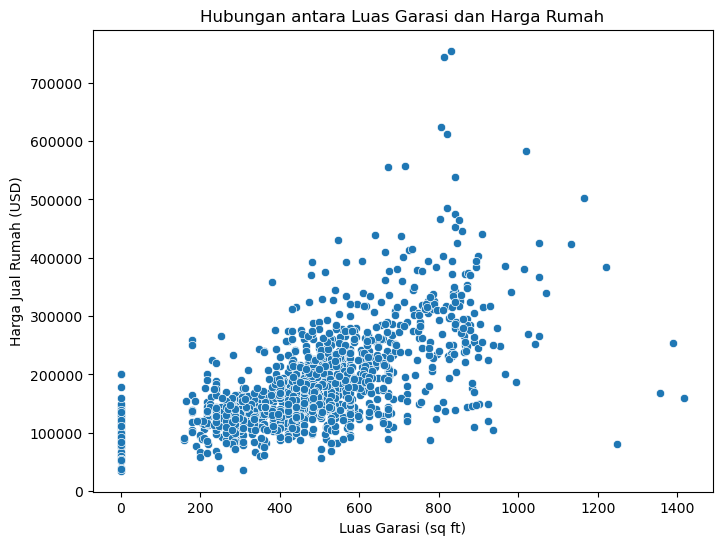

In [84]:
# Scatterplot: GarageArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GarageArea'], y=df['SalePrice'])
plt.xlabel('Luas Garasi (sq ft)')
plt.ylabel('Harga Jual Rumah (USD)')
plt.title('Hubungan antara Luas Garasi dan Harga Rumah')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* Hipotesis tentang Hubungan Antar-Variabel
GrLivArea vs SalePrice
📌 Hipotesis:

Semakin besar luas area tempat tinggal (GrLivArea), semakin tinggi harga rumah (SalePrice).
Hubungan yang diharapkan: positif linier, artinya rumah yang lebih luas cenderung memiliki harga lebih mahal.
Outlier? Mungkin ada beberapa rumah kecil dengan harga mahal atau rumah besar dengan harga murah karena faktor lain seperti lokasi atau kualitas bangunan.
GarageArea vs SalePrice
📌 Hipotesis:

Semakin luas garasi (GarageArea), semakin tinggi kemungkinan harga rumah (SalePrice) meningkat.
Hubungan yang diharapkan: positif, tapi kemungkinan tidak sekuat GrLivArea, karena luas garasi bukan satu-satunya faktor utama dalam harga rumah.
Outlier? Bisa jadi ada rumah dengan garasi besar tapi harga rendah atau rumah mahal dengan garasi kecil.


Pertanyaan untuk Analisis Lanjutan
🔍 GrLivArea vs SalePrice

Apakah semua rumah besar memiliki harga lebih tinggi, atau ada pengecualian?
Apakah ada zona harga tinggi di mana luas rumah kecil tapi tetap mahal?
🔍 GarageArea vs SalePrice

Seberapa besar kontribusi luas garasi terhadap harga rumah dibandingkan faktor lain?
Apakah ada batas maksimum di mana luas garasi tidak lagi berdampak signifikan pada harga rumah?